Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

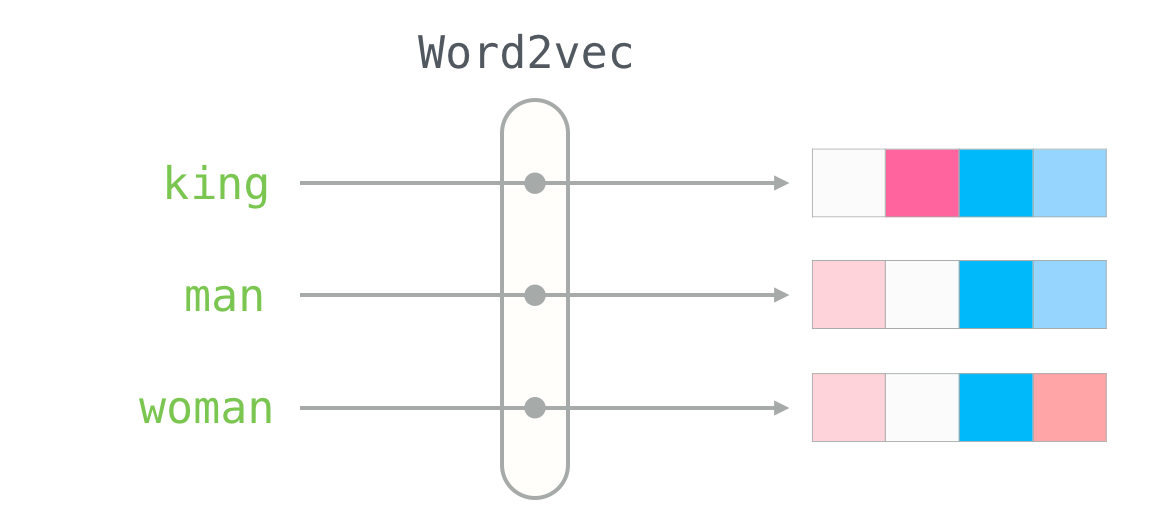

Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

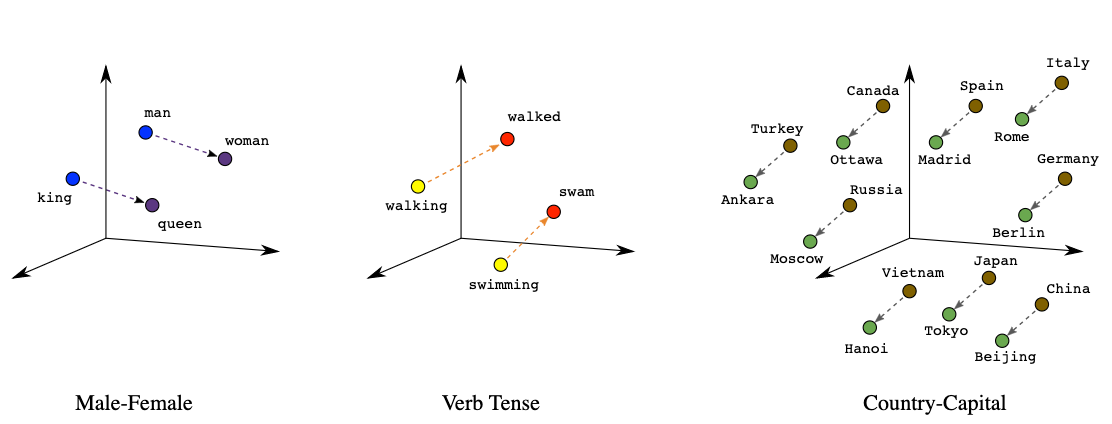

## How to get `word2vec` 
- Use Deep Learning to train your own data and model
- Use SpaCy to get pretrained model

## Word Vectors with Spacy

https://github.com/explosion/spaCy

https://spacy.io/usage/vectors-similarity

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. 

`python -m spacy download en_core_web_lg`

`en_vectors_web_lg`, which includes over 1 million unique vectors

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
x = 'dog cat lion dsfaf What is my purpose?'
doc = nlp(x)

In [53]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_,
          token.dep_, token.shape_, token.is_alpha, token.is_stop)

dog dog PROPN NNP compound xxx True False
cat cat PROPN NNP compound xxx True False
lion lion PROPN NNP nsubj xxxx True False
dsfaf dsfaf PROPN NNP ROOT xxxx True False
What what PRON WP attr Xxxx True True
is be AUX VBZ ccomp xx True True
my -PRON- DET PRP$ poss xx True True
purpose purpose NOUN NN attr xxxx True False
? ? PUNCT . punct ? False False


In [54]:
for token in doc:
    print(token.text, token.has_vector, token.vector.shape)

dog True (300,)
cat True (300,)
lion True (300,)
dsfaf False (300,)
What True (300,)
is True (300,)
my True (300,)
purpose True (300,)
? True (300,)


In [4]:
nlp.vocab.vectors.shape

(684831, 300)

## Semantic Similarity 

spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. 

For example, you can suggest a user content that’s similar to what they’re currently looking at, or label a support ticket as a duplicate if it’s very similar to an already existing one.

Each `Doc, Span and Token` comes with a `.similarity()` method that lets you compare it with another object, and determine the similarity.

In [5]:
x

'dog cat lion dsfaf'

In [6]:
doc = nlp(x)

In [7]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dsfaf 0.0
cat dog 0.80168545
cat cat 1.0
cat lion 0.5265438
cat dsfaf 0.0
lion dog 0.47424486
lion cat 0.5265438
lion lion 1.0
lion dsfaf 0.0
dsfaf dog 0.0
dsfaf cat 0.0
dsfaf lion 0.0
dsfaf dsfaf 1.0


<ipython-input-7-2c9f5b285b93>:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text, token2.text, token1.similarity(token2))


# Model Building for `word2vec` 

## Data Preparation 

In [8]:
 !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/_p/8smqg7_j6z75gs171g4yrdc00000gn/T/pip-req-build-zmmgoo75
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7634 sha256=1cb5310b0f98c4969ad314421f8a801a268d9872b0d00641cf148930e208eb10
  Stored in directory: /private/var/folders/_p/8smqg7_j6z75gs171g4yrdc00000gn/T/pip-ephem-wheel-cache-mbokr_et/wheels/fd/71/47/e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie


In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [10]:
import preprocess_kgptalkie as ps

In [11]:
df = pd.read_csv('../../Inputs/imdb_reviews.txt', sep = '\t', header = None)
df.columns = ['reviews', 'sentiment']

In [12]:
df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [13]:
x = "A very, very, very slow-moving, aimlss movie"
ps.spelling_correction(x).raw_sentences[0]

'A very, very, very slow-moving, aimless movie'

In [1]:
%%time
df['reviews'] = df['reviews'].apply(lambda x: ps.cont_exp(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_emails(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_html_tags(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_urls(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_special_chars(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_accented_chars(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.make_base(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.spelling_correction(x).raw_sentences[0])

NameError: name 'df' is not defined

In [15]:
df.head()

,reviews,sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lose the flat character ...,0
2,attempt artless with black white and clever ca...,0
3,very little music or anything to speak of,0
4,the good scene in the movie was when Gerard is...,1


## ML Model Building 

In [16]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [17]:
x = 'cat'
doc = nlp(x)

In [18]:
doc.vector.shape

(300,)

In [19]:
doc.vector.reshape(1, -1).shape

(1, 300)

In [20]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [21]:
df['vec'] = df['reviews'].apply(lambda x: get_vec(x))

In [22]:
df.head()

,reviews,sentiment,vec
0,a very very very slowmoving aimless movie abou...,0,"[-0.074153, 0.11350991, -0.23838478, 0.1394247..."
1,not sure who was more lose the flat character ...,0,"[0.062192187, 0.1952087, -0.14579107, -0.00481..."
2,attempt artless with black white and clever ca...,0,"[-0.19790795, 0.015133962, -0.107922316, -0.06..."
3,very little music or anything to speak of,0,"[-0.09093174, 0.25162372, -0.25681874, 0.15846..."
4,the good scene in the movie was when Gerard is...,1,"[0.064886056, 0.13270056, -0.15480983, -0.0207..."


In [23]:
df.shape

(748, 3)

In [24]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [25]:
X.shape

(748, 1)

In [26]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [27]:
X.shape

(748, 300)

In [28]:
y = df['sentiment']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [30]:
X_train.shape, X_test.shape

((598, 300), (150, 300))

## ML Model Traning and Testing 

In [31]:
clf = LogisticRegression()

In [32]:
clf.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        73
           1       0.84      0.79      0.81        77

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [35]:
import pickle 

In [36]:
pickle.dump(clf, open('../../Outputs/w2v_sentiment.pkl', 'wb'))

## Support Vector Machine on `word2vec`

In [37]:
from sklearn.svm import LinearSVC

In [38]:
clf = LinearSVC()

In [39]:
clf.fit(X_train, y_train)

LinearSVC()

In [40]:
y_pred = clf.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        73
           1       0.81      0.75      0.78        77

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150



## Grid Search Cross Validation for Hyperparameters Tuning¶ 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:

logit = LogisticRegression()

In [44]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': (1, 2, 3, 4)
}

In [45]:
clf = GridSearchCV(logit, hyperparameters, n_jobs=-1, cv = 5)

In [46]:
%%time
clf.fit(X_train, y_train)

CPU times: user 220 ms, sys: 236 ms, total: 457 ms
Wall time: 2.27 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (1, 2, 3, 4), 'penalty': ['l1', 'l2']})

In [47]:
clf.best_params_

{'C': 2, 'penalty': 'l2'}

In [48]:
clf.best_score_

0.8361344537815126

In [49]:
y_pred = clf.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        73
           1       0.85      0.81      0.83        77

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### References

http://jalammar.github.io/illustrated-word2vec/

https://github.com/laxmimerit?tab=repositories

Andreas Mueller